<a href="https://colab.research.google.com/github/surajpai50612/Mini-Project/blob/master/Image_Classification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Modules**

In [208]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC # Support Vector Classifier[SVC()]
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

### **Path of the Gathered Data**

In [230]:
path='/content/drive/My Drive/Input_datasets/' # specify this path in drive while executing the code

### **Preprocessing the Data**

In [210]:
flat_data=[] # image pixels in flattened style
target=[] # this is the list of target outputs
images=[] # list of resized images

for dirpath,dirnames,filenames in os.walk(path):
  for filename in filenames:
    category=dirpath.split('/')[-1] # categories
    target.append(category)
    img=imread(f'{path}/{category}/{filename}')
    img_resize=resize(img,(50,50,3)) # scaling image
    flat_data.append(img_resize.flatten())
    images.append(img_resize)

flat_data=np.array(flat_data)
images=np.array(images)
target=np.array(target)

In [211]:
print(flat_data.shape)
print(target.shape)
print(images.shape)

(50, 7500)
(50,)
(50, 50, 50, 3)


In [231]:
# Converting to Data Frame
df=pd.DataFrame(flat_data)
df['Target']=target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.614706,0.047059,0.031373,0.576471,0.054902,0.035294,0.515686,0.065686,0.047059,0.443137,0.074510,0.047059,0.345098,0.142157,0.058824,0.402941,0.416667,0.086275,0.400000,0.367647,0.092157,0.386275,0.211765,0.062745,0.502941,0.205882,0.062745,0.591176,0.174510,0.054902,0.659804,0.166667,0.058824,0.688235,0.133333,0.050980,0.702941,0.113725,0.043137,0.672549,...,0.386275,0.183333,0.086275,0.561765,0.081373,0.042157,0.633333,0.054902,0.027451,0.655882,0.059804,0.031373,0.653922,0.105882,0.039216,0.588235,0.199020,0.052941,0.674510,0.149020,0.095098,0.708824,0.167647,0.100000,0.727451,0.151961,0.107843,0.676471,0.125490,0.080392,0.648039,0.078431,0.043137,0.639216,0.131373,0.050980,0.633333,0.106863,0.043137,Strawberry fruit
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Strawberry fruit
2,0.945098,0.901961,0.904902,0.941176,0.894118,0.892157,0.945098,0.898039,0.898039,0.945098,0.890196,0.886275,0.941176,0.877451,0.859804,0.941176,0.866667,0.843137,0.941176,0.878431,0.866667,0.936275,0.872549,0.858824,0.925490,0.854902,0.835294,0.933333,0.878431,0.875490,0.937255,0.898039,0.905882,0.933333,0.886275,0.883333,0.923529,0.862745,0.854902,0.921569,...,0.603922,0.498039,0.498039,0.590196,0.490196,0.498039,0.592157,0.488235,0.495098,0.603922,0.483333,0.474510,0.592157,0.476471,0.468627,0.601961,0.499020,0.500980,0.613725,0.522549,0.536275,0.629412,0.537255,0.547059,0.650980,0.563725,0.566667,0.666667,0.576471,0.572549,0.664706,0.564706,0.563725,0.662745,0.567647,0.568627,0.645098,0.555882,0.558824,Strawberry fruit
3,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,Strawberry fruit
4,0.760183,0.781412,0.515333,0.870588,0.481136,0.376117,0.863439,0.201176,0.202796,0.769946,0.174573,0.202024,0.721569,0.438429,0.450980,0.713725,0.207294,0.203373,0.729412,0.073075,0.117647,0.715808,0.039216,0.098039,0.646126,0.068980,0.085342,0.541176,0.167116,0.098039,0.419608,0.304818,0.094118,0.427451,0.352941,0.074510,0.456863,0.384314,0.097235,0.619529,...,0.202314,0.210157,0.109804,0.253294,0.186660,0.109850,0.426941,0.039216,0.035294,0.680039,0.074275,0.050980,0.658784,0.051913,0.041490,0.503961,0.037133,0.050980,0.255020,0.003922,0.027451,0.105882,0.003922,0.011765,0.173882,0.019608,0.019608,0.456220,0.040534,0.035294,0.592639,0.035294,0.031373,0.686275,0.052785,0.058470,0.804941,0.163516,0.159595,Strawberry fruit


### **Applying Support Vector Machine(SVM) classification Algorithm**

In [213]:
x=flat_data # Independent variable
y=target # Dependent variable

# Splitting into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [214]:
x_train.shape

(37, 7500)

In [215]:
x_test.shape

(13, 7500)

In [216]:
y_train.shape

(37,)

In [217]:
y_test.shape

(13,)

### **Finding best parameter using GridSearch CV**

In [218]:
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf','linear','poly']}

model=GridSearchCV(SVC(),param_grid)

# Fitting the model
model.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [219]:
# Predicted output
y_pred=model.predict(x_test)
y_pred

array(['Orange fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Orange fruit', 'Strawberry fruit', 'Orange fruit', 'Orange fruit',
       'Orange fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Strawberry fruit', 'Strawberry fruit', 'Orange fruit'],
      dtype='<U16')

In [220]:
# Actual output
y_test

array(['Orange fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Orange fruit', 'Strawberry fruit', 'Orange fruit', 'Orange fruit',
       'Orange fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Orange fruit', 'Orange fruit', 'Orange fruit'], dtype='<U16')

####**Accuracy**

In [221]:
print("Accuracy is : ",accuracy_score(y_pred,y_test))

Accuracy is :  0.8461538461538461


####**Confusion Matrix**

In [222]:
print("Confusion Matrix is :\n\n",confusion_matrix(y_pred,y_test))

Confusion Matrix is :

 [[6 0]
 [2 5]]


####**Classification Report**

In [223]:
print("Classification report is :\n\n{}:\n\n\n{}\n".format(model,classification_report(y_test, y_pred)))

Classification report is :

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):


                  precision    recall  f1-score   support

    Orange fruit       1.00      0.75      0.86         8
Strawberry fruit       0.71      1.00      0.83         5

        accuracy

###**Predicting for any new image**

##### **Case 1 : Prediction for Strawberry Image**

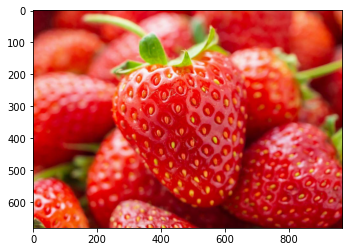

In [224]:
url='https://static.independent.co.uk/s3fs-public/thumbnails/image/2020/05/20/19/istock-1143163513.jpg?w968h681' # URL of the image
i=imread(url)
plt.imshow(i)

In [225]:
img_resize_1=resize(i,(50,50,3)) # scaling image
img_1=img_resize_1.flatten() # flattening the image
img_1.shape

(7500,)

#####**Predicting the output**

In [226]:
model.predict([img_1])

array(['Strawberry fruit'], dtype='<U16')

##### **Case 2 : Prediction for Orange Image**

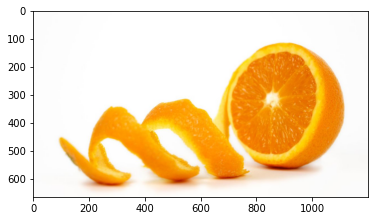

In [227]:
url='https://www.thestatesman.com/wp-content/uploads/2019/02/Orange-peel.jpg' # URL of the image
i=imread(url)
plt.imshow(i)

In [228]:
img_resize_1=resize(i,(50,50,3)) # scaling image
img_1=img_resize_1.flatten() # flattening the image
img_1.shape

(7500,)

#####**Predicting the output**

In [229]:
model.predict([img_1])

array(['Orange fruit'], dtype='<U16')